 # Classifying Resumes to different categories with Python

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the data as DataFrame
#reading and storing CSV file into variabe resumeData
resumeData = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
#Creating a new column structured_resume
resumeData['structured_resume'] = ''
resumeData.head()

,Category,Resume,structured_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
#printing the unique categories presented in the resumes
print("Displaying the unique categories in resume ")
print(resumeData['Category'].unique())

Displaying the unique categories in resume 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
#Printing the unique categories of resume and number of records present
print ("Displaying the unique categories of resume and number of records")
Datas=resumeData['Category'].value_counts()
print(Datas)

Displaying the unique categories of resume and number of records
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


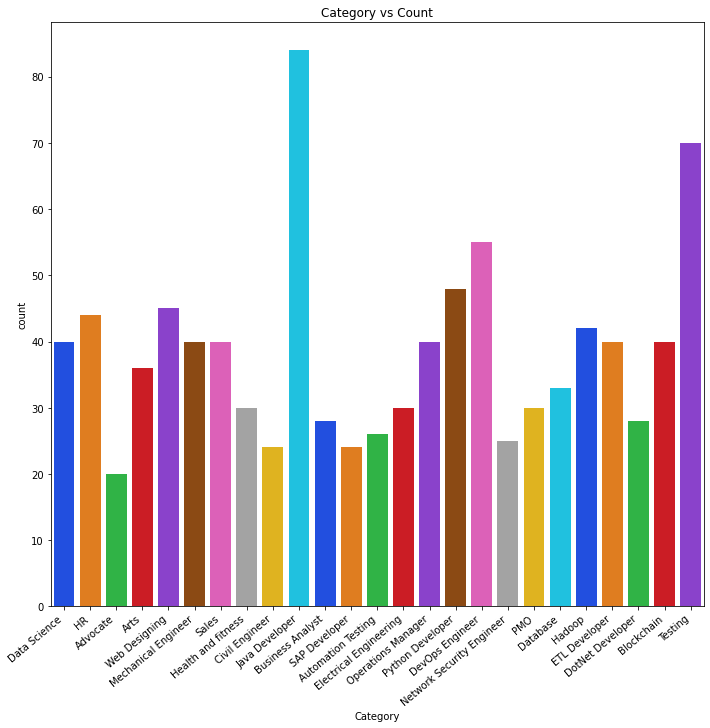

In [5]:
#Importing seaborn plotting the graph between Categories vs count
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Category", data=resumeData,palette="bright")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Category vs Count")
plt.show()

In [6]:
#plotting piechart using Matplotlib
from matplotlib.gridspec import GridSpec
targetCount = resumeData['Category'].value_counts()
targetLabel  = resumeData['Category'].unique()

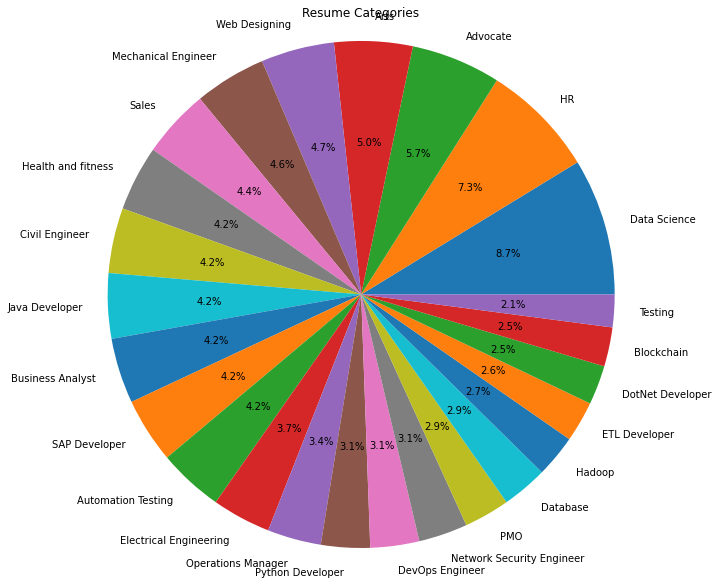

In [36]:
#plotting piechart using Matplotlib
plt.figure(figsize=(8,8))
plt.pie(targetCount,labels=targetLabel,autopct='%1.1f%%')
plt.title('Resume Categories')
plt.axis('equal')
plt.show()

In [8]:
#importing re library
import re
#Function for cleaning Resume
def clean_resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs in the text
    Text = re.sub('@\S+', '  ', Text)  # remove mentions in the text
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)  # remove punctuations in the text
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc in the text
    Text = re.sub('#\S+', '', Text)  # remove hashtags in the text
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text) 
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace in the text
    return Text
    
resumeData['structured_resume'] = resumeData.Resume.apply(lambda x: clean_resume(x))

In [11]:
#Importing NLTK library
import nltk
from nltk.corpus import stopwords
import string
#Importing Wordcloud library
from wordcloud import WordCloud
#donwloading stopwords from nltk
nltk.download('stopwords')
#donwloading punkt from nltk for tokenization
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pranav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
#cleaning the sentences
Set_Of_StopWords = set(stopwords.words('english')+['``',"''"])
#creating a list of words from all the resumes to create a wordcloud
Words =[]
#creating a list of sentences from all the resumes
Sentences = resumeData['structured_resume'].values
#looping through all the sentences
for sentence in Sentences:
    #tokenizing the sentences into words
    total_words = nltk.word_tokenize(sentence)
    #looping through all the words
    for word in total_words:
        #checking if the word is not a stopword and not a punctuation
        if word not in Set_Of_StopWords and word not in string.punctuation:
            #appending the word to the list of words
            Words.append(word) 

In [18]:
#Using wordcloud we are finding the frequency of words
wordfrequencydist = nltk.FreqDist(Words)
mostCommon = wordfrequencydist.most_common(50)
print(mostCommon)


[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2162), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('2', 776), ('Java', 773), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [22]:
#Importing sklearn library
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [23]:
#Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
#Converting words in to categorical values
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeData[i] = le.fit_transform(resumeData[i])

In [27]:
#mporting library from splitting training and testing dataset
from sklearn.model_selection import train_test_split
#Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
required_Text = resumeData['structured_resume'].values
required_Target = resumeData['Category'].values
#Loading TfidfVectorizer
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
#Fit and transform the training data
word_vectorizer.fit(required_Text)
WordFeatures = word_vectorizer.transform(required_Text)
print ("Feature completed")


Feature completed


In [28]:
#Splitting training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,required_Target,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [32]:
#training the model and printing the classification report
#Here we are using the one vs the rest classifier MultinomialNB
#one vs the rest classifier is used to classify the data into multiple classes using binary classification
clf = OneVsRestClassifier(MultinomialNB())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("MultinomialNB")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

print(metrics.classification_report(y_test, prediction))

MultinomialNB
Accuracy on training dataset: 0.99
Accuracy on test dataset: 0.97
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       0.86      1.00      0.93        19
 

In [30]:
#training the model and printing the classification report
#Here we are using the one vs the rest classifier KNeighborsClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

print(metrics.classification_report(y_test, prediction))

KNeighbors Classifier
Accuracy on training dataset: 0.99
Accuracy on test dataset: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00    